# Real Estate Price Predictions
Using the <i>Ames Housing</i> dataset, this notebook will apply machine learning models to predict our target variable, 'SalePrice'.

## The Objective
This is a Regression problem, which we will attempt first with a simple Linear Regression model before moving on to more complex and computationally-expensive algorithms like Random Forests and Gradient Boosting. Each model will be scored based on residual error and model run time for comparison.


## Project Setup

### Modules used
This project will lean heavily on pandas, numpy, and seaborn for Exploratory Data Analysis ("EDA", hereafter) and the sklearn library for training, testing, and scoring our models. For variable descriptions, see <i>var_descriptions.md</i> file.


In [1]:
# import libraries
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### Data
We will use the <i>AmesHousing</i> dataset available from [kaggle](https://www.kaggle.com/prevek18/ames-housing-dataset). We will set a dataframe <i>orig_data</i> which we will immediate copy to a second dataframe <i>df</i> on which we will perform proper EDA. We will then model Linear Regression, Random Forest, and Gradient Boosting on both dataframes to see what improvements we make through a propert EDA process.

In [2]:
# import data
orig_data = pd.read_csv('AmesHousing.csv')
df = orig_data.copy()

In [3]:
df.shape

(2930, 82)

In [4]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [5]:
df.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [7]:
print(f"""
Initial DataFrame Inspection
-----------------------------
No. observations: {df.shape[0]}
No. features: {df.shape[1]}
No. numeric features: {df.select_dtypes(include=['number']).shape[1]}
No. non-numeric features: {df.select_dtypes(include=['object']).shape[1]}
No. missing values: {df.isna().values.sum()}
""")


Initial DataFrame Inspection
-----------------------------
No. observations: 2930
No. features: 82
No. numeric features: 39
No. non-numeric features: 43
No. missing values: 13997



## EDA - Target Variable
We will start by examining our target variable, 'SalePrice'.

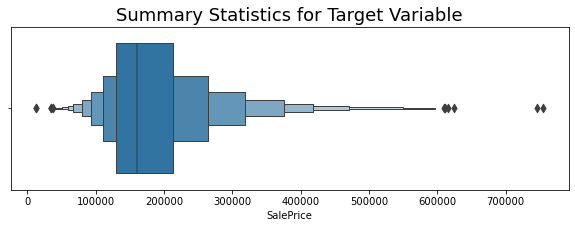


Target Variable Statistics:
count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64



In [8]:
plt.figure(figsize=(10,3))
sns.boxenplot(df['SalePrice'])
plt.title("Summary Statistics for Target Variable", fontsize=18)
plt.show()

print(f"""
Target Variable Statistics:
{df['SalePrice'].describe()}
""")

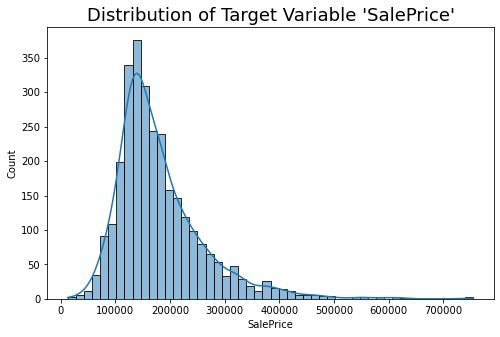

In [9]:
plt.figure(figsize=(8, 5))
sns.histplot(df['SalePrice'], bins=50, kde=True)
plt.title("Distribution of Target Variable 'SalePrice'", fontsize=18)
plt.show()

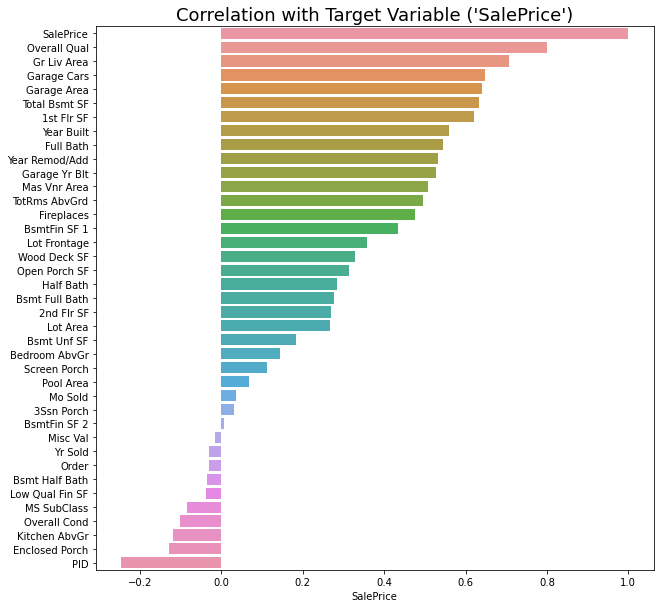

In [10]:
plt.figure(figsize=(10,10))
sale_price_corr = df.corr()['SalePrice'].sort_values(ascending=False)
sns.barplot(sale_price_corr, x='SalePrice', y=sale_price_corr.index)
plt.title("Correlation with Target Variable ('SalePrice')", fontsize=18)
plt.show()


### Target Variable Summary.
In our first round of EDA, we see that our target variable 'SalePrice' is in the range \$12,789 to \$755,000. The mean is $180,796 and we likely have outliers on both ends of the range. Our initial correlation plot shows we have over 20 variables that at least moderately correlated with the target variable.

However, many features are not yet represented in correlation plots due to data type. In part 2 of EDA, we will focus on selecting the best features for our model.

## EDA - Feature Selection
This section will focus on cleaning data and reducing final feature set for modelling. For some of our variables, we will need to perform data imputation and label encoding. Our goal is to reduce the number of features to those necessary for an accurate model.

Benefits of dimensionality reduction:
<ol>
	<li>Reduces training time.</li>
	<li>Reduces overfitting.</li>
	<li>Improves accuracy.</li>
</ol>



### Missing Values
First, we should address missing values in the dataset. It is safe to assume with real estate information that missing values are most likely due to features not present on the property. This means we can simply fill the missing data with zeroes.

In [11]:
print(f"""
There are {df.isna().values.sum()} missing values in this dataset!""")


There are 13997 missing values in this dataset!


In [12]:
df.fillna(0, inplace=True)

### Dealing with Categorical Variables
Now that we have dealt with our missing values, we can turn to categorical variables. We have a lot of data imputation and label encoding to get the dataset ready for modelling.

For some variables, it may make more sense to encode dummy variables while others will likely give more benefit as ordinals.

In [13]:
df.columns[df.dtypes=='object']

Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature',
       'Sale Type', 'Sale Condition'],
      dtype='object')

#### Zoning.
"Location. Location. Location." Anyone even remotely acquainted with buying, selling, developing, or representing real estate properties knows the location can make a mediocre property expensive or a great one cheap. All of our property data is from the same city, so the Zoning classification is likely the next largest location segmentation.

In [14]:
df['MS Zoning'].value_counts()

RL         2273
RM          462
FV          139
RH           27
C (all)      25
A (agr)       2
I (all)       2
Name: MS Zoning, dtype: int64

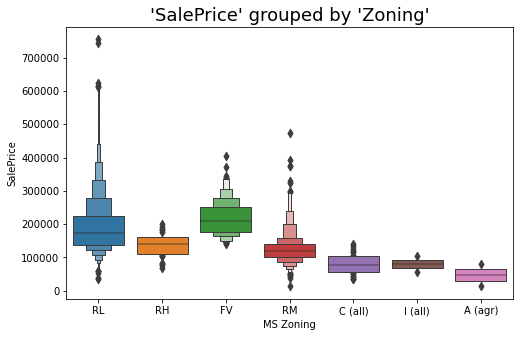

In [15]:
plt.figure(figsize=(8, 5))
sns.boxenplot(x=df['MS Zoning'], y=df['SalePrice'])
plt.title("'SalePrice' grouped by 'Zoning'", fontsize=18)
plt.show()

In [16]:
print('Sale Price by Zoning')
df.groupby('MS Zoning')['SalePrice'].mean().sort_values(ascending=False)

Sale Price by Zoning


MS Zoning
FV         218986.949640
RL         191283.251650
RH         136419.777778
RM         126781.393939
I (all)     80312.500000
C (all)     79795.040000
A (agr)     47300.000000
Name: SalePrice, dtype: float64

Certainly, we are seeing great variance in mean sale price based on the different zones. I will convert these values from their abbreviated Zone to ordinals using a 1-10 scale used by some of our other features.

In [17]:
df['MS Zoning'] = df['MS Zoning'].replace(['FV', 'RL', 'RH', 'RM', 'I (all)', 'C (all)', 'A (agr)'], [10,9,8,7,6,5,4])

#### Neighborhood.
Within the various zones, we have the different neighborhoods.

In [18]:
df['Neighborhood'].value_counts()

NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: Neighborhood, dtype: int64

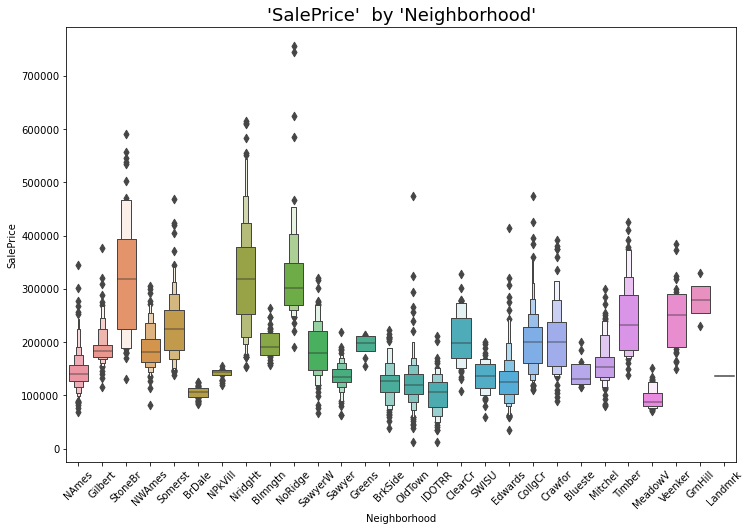

In [19]:
plt.figure(figsize=(12, 8))
sns.boxenplot(x=df['Neighborhood'], y=df['SalePrice'])
plt.title("'SalePrice'  by 'Neighborhood'", fontsize=18)
plt.xticks(rotation = 45)
plt.show()

In [20]:
print('Price/ft by Neighborhood')
df.groupby('Neighborhood')['SalePrice'].mean().sort_values(ascending=False)

Price/ft by Neighborhood


Neighborhood
NoRidge    330319.126761
StoneBr    324229.196078
NridgHt    322018.265060
GrnHill    280000.000000
Veenker    248314.583333
Timber     246599.541667
Somerst    229707.324176
ClearCr    208662.090909
Crawfor    207550.834951
CollgCr    201803.434457
Blmngtn    196661.678571
Greens     193531.250000
Gilbert    190646.575758
NWAmes     188406.908397
SawyerW    184070.184000
Mitchel    162226.631579
NAmes      145097.349887
Blueste    143590.000000
NPkVill    140710.869565
Landmrk    137000.000000
Sawyer     136751.152318
SWISU      135071.937500
Edwards    130843.381443
BrkSide    124756.250000
OldTown    123991.891213
BrDale     105608.333333
IDOTRR     103752.903226
MeadowV     95756.486486
Name: SalePrice, dtype: float64

The Neighborhood variable will likely have a great impact on our target variable. We see an average price range from $96k in Meadowview to $198k in North Ridge based on the Neighborhood. Due to the number of unique neighborhoods in the data set and the likely collinearity with other variables, I am going to use dummy variables here.

In [21]:
df['neighborhood'] = df['Neighborhood']
df = pd.get_dummies(df, columns={'Neighborhood'}, prefix='nhd')

#### Lot Config.
Zooming in yet again from Neighborhood, we can see the different types of lot configurations on which the properties sit. 

In [22]:
df['Lot Config'].value_counts()

Inside     2140
Corner      511
CulDSac     180
FR2          85
FR3          14
Name: Lot Config, dtype: int64

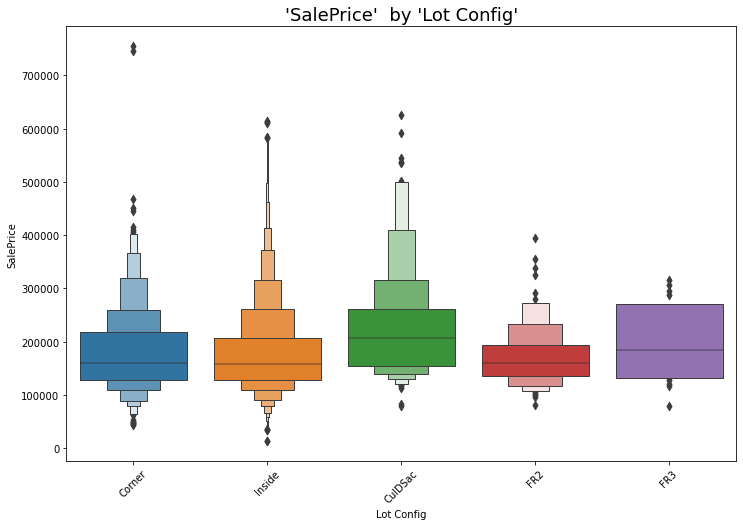

In [23]:
plt.figure(figsize=(12, 8))
sns.boxenplot(x=df['Lot Config'], y=df['SalePrice'])
plt.title("'SalePrice'  by 'Lot Config'", fontsize=18)
plt.xticks(rotation = 45)
plt.show()

In [24]:
print('SalePrice by Lot Configuration')
df.groupby('Lot Config')['SalePrice'].mean().sort_values(ascending=False)

SalePrice by Lot Configuration


Lot Config
CulDSac    225531.872222
FR3        196635.857143
Corner     179956.937378
Inside     177395.035514
FR2        174122.894118
Name: SalePrice, dtype: float64

We have some odd behavior in the 'Lot Config' feature. We do see variation in average price-per-foot; however, the likelihood of increased price is not direcly related to an increase in privacy, as one might assume. Let's use dummies here.

In [25]:
df = pd.get_dummies(df, columns={'Lot Config'}, prefix='lot')

#### Foundation
Does foundation make a material difference to the price of a property?

In [26]:
df['Foundation'].value_counts()

PConc     1310
CBlock    1244
BrkTil     311
Slab        49
Stone       11
Wood         5
Name: Foundation, dtype: int64

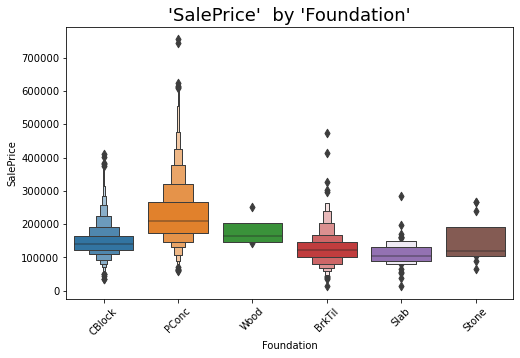

In [27]:
plt.figure(figsize=(8, 5))
sns.boxenplot(x=df['Foundation'], y=df['SalePrice'])
plt.title("'SalePrice'  by 'Foundation'", fontsize=18)
plt.xticks(rotation = 45)
plt.show()

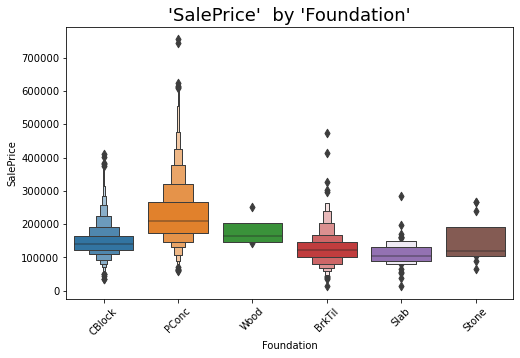

In [28]:
plt.figure(figsize=(8, 5))
sns.boxenplot(x=df['Foundation'], y=df['SalePrice'])
plt.title("'SalePrice'  by 'Foundation'", fontsize=18)
plt.xticks(rotation = 45)
plt.show()

In [29]:
df.groupby('Foundation')['SalePrice'].mean().sort_values(ascending=False)

Foundation
PConc     227069.483969
Wood      180900.000000
Stone     149786.818182
CBlock    148284.153537
BrkTil    128107.276527
Slab      110457.693878
Name: SalePrice, dtype: float64

#### Utilities
Similarly, Utilities represents a scale of services present on the property. Let's see what's inside.

In [30]:
df.Utilities.value_counts()

AllPub    2927
NoSewr       2
NoSeWa       1
Name: Utilities, dtype: int64

Nearly all variables have All Public utilities, rendering this variable superfluous. We will drop it.

In [31]:
df = df.drop(columns='Utilities')

#### Garage Quality.
The next interesting categorical feature is 'Garage Qual'.

In [32]:
df['Garage Qual'].value_counts()

TA    2615
0      159
Fa     124
Gd      24
Po       5
Ex       3
Name: Garage Qual, dtype: int64

In [33]:
print(f"""
Avg. price per foot with Garage Qual: {df[df['Garage Qual']!=0]['SalePrice'].mean()}
Avg. price per foot without Garage Qual: {df[df['Garage Qual']==0]['SalePrice'].mean()}
""")


Avg. price per foot with Garage Qual: 185111.6975821003
Avg. price per foot without Garage Qual: 105584.54088050315



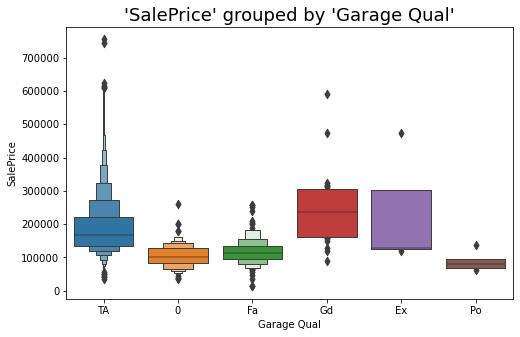

In [34]:
plt.figure(figsize=(8, 5))
sns.boxenplot(x=df['Garage Qual'], y=df['SalePrice'])
plt.title("'SalePrice' grouped by 'Garage Qual'", fontsize=18)
plt.show()


While we see a large increase in 'SalePrice' when 'Garage Qual' is listed for a property, we don't see a consistent increase in 'SalePrice' for increased scores for this variable. This likely means that the presence of a garage on the property, or possibly <b>garage size</b> is the more important metric. 

In [35]:
df.columns[df.columns.str.contains('Garage')==True].to_list()
df.drop(columns={'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Area', 'Garage Qual', 'Garage Cond'}, inplace=True)

<b> Mas Vnr Type </b>

Next we can look into Mas Vnr Type.

In [36]:
df['Mas Vnr Type'].value_counts()

None       1752
BrkFace     880
Stone       249
BrkCmn       25
0            23
CBlock        1
Name: Mas Vnr Type, dtype: int64

In [37]:
print(f"""
Avg. price with Mas Vnr Type: {df[df['Mas Vnr Type']==0]['SalePrice'].mean()}
Avg. price without Mas Vnr Type: {df[df['Mas Vnr Type']!=0]['SalePrice'].mean()}
""")


Avg. price with Mas Vnr Type: 233348.73913043478
Avg. price without Mas Vnr Type: 180380.26659786722



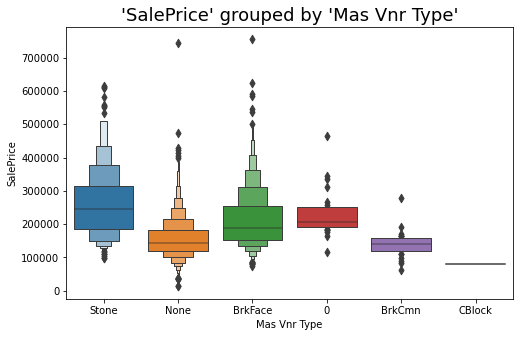

In [38]:
plt.figure(figsize=(8, 5))
sns.boxenplot(x=df['Mas Vnr Type'], y=df['SalePrice'])
plt.title("'SalePrice' grouped by 'Mas Vnr Type'", fontsize=18)
plt.show()


In [39]:
df.groupby('Mas Vnr Type')['SalePrice'].mean()

Mas Vnr Type
0          233348.739130
BrkCmn     140199.000000
BrkFace    210798.592045
CBlock      80000.000000
None       154338.711187
Stone      260547.297189
Name: SalePrice, dtype: float64

As with our Zoning variable, we see that 'SalePrice' is affected by 'Mas Vnr Type', so let's convert to ordinal. Oddly, our second highest price-per-foot comes from properties missing values for this column. I will re-encode missing values to fit the ordinal scale.

In [40]:
df['Mas Vnr Type'] = df['Mas Vnr Type'].replace(['CBlock', 'BrkCmn', 'None', 'BrkFace', 0, 'Stone'], [2,4,5,7,9,10])
# df['Mas Vnr Type'] = pd.Categorical(df['Mas Vnr Type'], ordered=True)

<b> Land Slope. </b>

Another factor that could weigh heavily on a purchase decision is the slope of the lot. This is another case where it makes sense to use ordinals rather than the abbreviated "Gentle", "Moderate", and "Severe".

In [41]:
df['Land Slope'].value_counts()

Gtl    2789
Mod     125
Sev      16
Name: Land Slope, dtype: int64

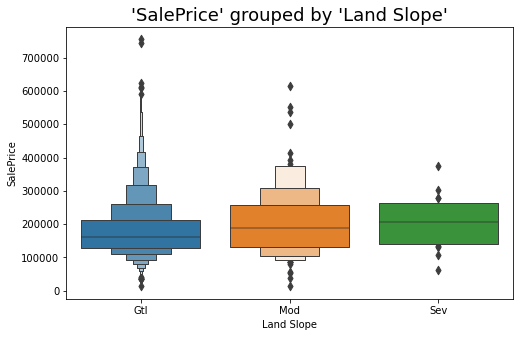

In [42]:
plt.figure(figsize=(8, 5))
sns.boxenplot(x=df['Land Slope'], y=df['SalePrice'])
plt.title("'SalePrice' grouped by 'Land Slope'", fontsize=18)
plt.show()

In [43]:
print('Sale Price by Land Slope')
df.groupby('Land Slope')['SalePrice'].describe()

Sale Price by Land Slope


,count,mean,std,min,25%,50%,75%,max
Land Slope,,,,,,,,
Gtl,2789.0,179565.365005,78487.303010,12789.0,129200.0,159950.0,212000.0,755000.0
Mod,125.0,204853.784000,103424.468431,13100.0,131000.0,188000.0,257076.0,615000.0
Sev,16.0,207370.625000,83062.243767,61000.0,141000.0,206975.0,264250.0,375000.0


Interestingly, it seems that a increased severity in slope <b>does not</b> negatively affect 'SalePrice'. From personal experience, I can say this data surprises me. I am more than willing to pay more for a lot with a gentle slope (or <i>"more usable area"</i>, in real estate developer terms). 

With this information, my first thought is that the topography of Ames, Iowa is such that any lot of considerable size may have a more sever slope. We can easily test this.

In [44]:
print('Lot Area by Land Slope')
df.groupby('Land Slope')['Lot Area'].describe()

Lot Area by Land Slope


,count,mean,std,min,25%,50%,75%,max
Land Slope,,,,,,,,
Gtl,2789.0,9741.875583,4706.790094,1300.0,7440.0,9360.0,11409.00,63887.0
Mod,125.0,12918.984000,10871.877579,2394.0,7200.0,10010.0,14100.00,70761.0
Sev,16.0,59277.937500,66037.356287,5400.0,18241.5,26896.5,71687.25,215245.0


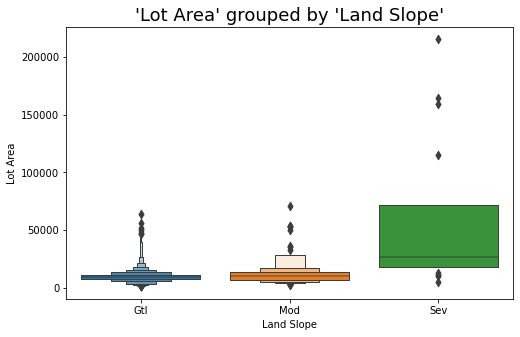

In [45]:
plt.figure(figsize=(8,5))
sns.boxenplot(data=df, x='Land Slope', y='Lot Area')
plt.title("'Lot Area' grouped by 'Land Slope'", fontsize=18)
plt.show()

Based on this data, I have to say that topography is a factor for 'Land Slope'. With the smallest property listed with severe 'Land Slope' at <i>four times the size</i> of the smallest with gentle slope, and nearly as large a variance for the largest property in each respective class, I am sure our model will perform better without 'Land Slope'. We should remove it.

In [46]:
df = df.drop(columns={'Land Slope'})

#### Building Type

In [47]:
df['Bldg Type'].value_counts()

1Fam      2425
TwnhsE     233
Duplex     109
Twnhs      101
2fmCon      62
Name: Bldg Type, dtype: int64

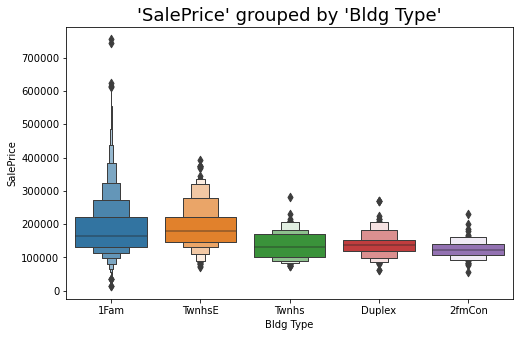

In [48]:
plt.figure(figsize=(8, 5))
sns.boxenplot(x=df['Bldg Type'], y=df['SalePrice'])
plt.title("'SalePrice' grouped by 'Bldg Type'", fontsize=18)
plt.show()

In [49]:
df.groupby('Bldg Type')['SalePrice'].describe()

,count,mean,std,min,25%,50%,75%,max
Bldg Type,,,,,,,,
1Fam,2425.0,184812.041237,82821.802329,12789.0,130000.0,165000.0,220000.0,755000.0
2fmCon,62.0,125581.709677,31089.239840,55000.0,106562.5,122250.0,140000.0,228950.0
Duplex,109.0,139808.935780,39498.973534,61500.0,118858.0,136905.0,153337.0,269500.0
Twnhs,101.0,135934.059406,41938.931130,73000.0,100500.0,130000.0,170000.0,280750.0
TwnhsE,233.0,192311.914163,66191.738021,71000.0,145000.0,180000.0,222000.0,392500.0


Again, I'm finding some surprising information within this data set. A single family home generally commands a steeper price tag when compared to townhouses--even end-units. However, this data suggests that an end-unit townhouse is selling at a higher average price than any other building type.

I think we have another multicollinearity issue. Going back to a statement I made earlier about location being the primary driver of cost, I'm assuming that townhouses are being built in higher end zones overall relative to single family. Let's check.

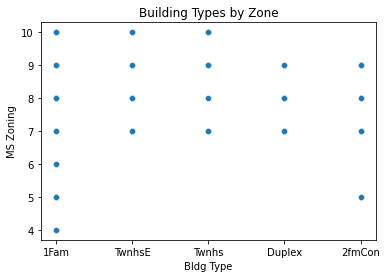

In [50]:
plt.plot(figsize=(8,5))
sns.scatterplot(x='Bldg Type', y='MS Zoning', data=df)
plt.title('Building Types by Zone')
plt.show()

This plot is a great example of showing the value in converting categorical information to ordinals. We clearly see that townhouses are being built only in zones we rated as being higher (i.e. more valuable). 

For our 'Bldg Type' variables, however, it may be better to encode to dummy variables.

In [51]:
df = pd.get_dummies(df, columns={'Bldg Type'}, prefix='type')

#### Heating and Cooling
Due to the range of build years in this data set, we should check the heating and cooling variables.

In [71]:
df['Heating'].value_counts()

GasA     2885
GasW       27
Grav        9
Wall        6
OthW        2
Floor       1
Name: Heating, dtype: int64

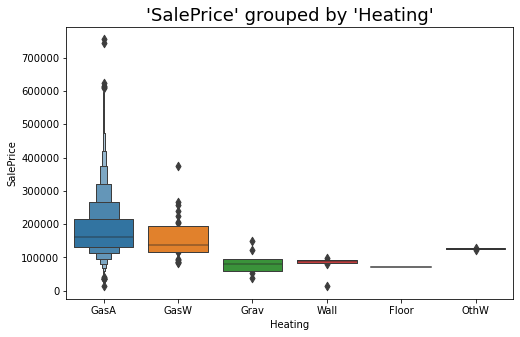

In [72]:
plt.figure(figsize=(8, 5))
sns.boxenplot(x=df['Heating'], y=df['SalePrice'])
plt.title("'SalePrice' grouped by 'Heating'", fontsize=18)
plt.show()

In [73]:
df.groupby('Heating')['SalePrice'].describe()

,count,mean,std,min,25%,50%,75%,max
Heating,,,,,,,,
Floor,1.0,72500.000000,NaN,72500.0,72500.0,72500.0,72500.0,72500.0
GasA,2885.0,181594.075563,79825.602993,12789.0,130000.0,161000.0,214000.0,755000.0
GasW,27.0,159009.185185,67602.469892,82000.0,116750.0,136000.0,193250.0,375000.0
Grav,9.0,83711.111111,34769.255257,37900.0,60000.0,79000.0,96500.0,150000.0
OthW,2.0,125750.000000,5303.300859,122000.0,123875.0,125750.0,127625.0,129500.0
Wall,6.0,77150.000000,31860.618324,13100.0,82925.0,88750.0,92175.0,98000.0


There are two values that for Gas heating, in which the majority of transaction take place. Instead of creating dummies for each unique variable, I will create a single dummy for 'heat_gas'.

In [75]:
df['heat_gas'] = np.where(df['Heating'].str.contains('Gas'), 1,0)

In [78]:
df['Central Air'].value_counts()

Y    2734
N     196
Name: Central Air, dtype: int64

In [80]:
df['central_air'] = df['Central Air'].replace(['Y', 'N'], [1, 0])

<b> Quality and Condition features.</b>

We have several features for various quality and conditions. A subset of these are numeric and return 1-10 scale, while others include only abbreviations for grades such as "Good" or "Excellent". 

These features include labels such as "Quality" or "Condition", so I will pull all columns with "Cond" or "Qu". We should encode these to ordinals and convert all categorical variables to the 'category' dtype.

In [52]:
encode_qual = df.columns[
    (df.dtypes=='object') &
    ((df.columns.str.contains('Qu')) |
    (df.columns.str.contains('Cond')))].to_list()

In [53]:
{col: [df[encode_qual][col].unique()] for col in df[encode_qual]}

{'Condition 1': [array(['Norm', 'Feedr', 'PosN', 'RRNe', 'RRAe', 'Artery', 'PosA', 'RRAn',
         'RRNn'], dtype=object)],
 'Condition 2': [array(['Norm', 'Feedr', 'PosA', 'PosN', 'Artery', 'RRNn', 'RRAe', 'RRAn'],
        dtype=object)],
 'Exter Qual': [array(['TA', 'Gd', 'Ex', 'Fa'], dtype=object)],
 'Exter Cond': [array(['TA', 'Gd', 'Fa', 'Po', 'Ex'], dtype=object)],
 'Bsmt Qual': [array(['TA', 'Gd', 'Ex', 0, 'Fa', 'Po'], dtype=object)],
 'Bsmt Cond': [array(['Gd', 'TA', 0, 'Po', 'Fa', 'Ex'], dtype=object)],
 'Kitchen Qual': [array(['TA', 'Gd', 'Ex', 'Fa', 'Po'], dtype=object)],
 'Fireplace Qu': [array(['Gd', 0, 'TA', 'Po', 'Ex', 'Fa'], dtype=object)],
 'Sale Condition': [array(['Normal', 'Partial', 'Family', 'Abnorml', 'Alloca', 'AdjLand'],
        dtype=object)]}

We need to remove "Condition 1", "Condition 2", and "Sale Condition" from col_list since they are not qualitative scores.

In [54]:
encode_qual = encode_qual[2:8]
encode_qual

['Exter Qual',
 'Exter Cond',
 'Bsmt Qual',
 'Bsmt Cond',
 'Kitchen Qual',
 'Fireplace Qu']

Now that we have a list of features to update, I will create a new pandas dataframe containing the string values to replace alongside the new ordinal values taking their place. This will give us some added efficiencies in replacing this data across multiple columns.

In [55]:
cond = {"Str" : ['Ex', 'Gd', 'TA', 'Fa', 'Po'], 'Ord' : [10, 8, 6, 4, 2]}
grades = pd.DataFrame(data=cond)
grades

,Str,Ord
0,Ex,10
1,Gd,8
2,TA,6
3,Fa,4
4,Po,2


In [56]:
for i in range(0,5):
    df = df.replace([grades['Str'][i]], [grades['Ord'][i]])


In [57]:
df[encode_qual]

,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Kitchen Qual,Fireplace Qu
0,6,6,6,8,6,8
1,6,6,6,6,6,0
2,6,6,6,6,8,0
3,8,6,6,6,10,6
4,6,6,8,6,6,6
...,...,...,...,...,...,...
2925,6,6,6,6,6,0
2926,6,6,8,6,6,0
2927,6,6,8,6,6,0
2928,6,6,8,6,6,6


<b>Dates.</b>

Two of the most import questions in real estate are "When?" and "Where?". We have already seen many features that describe the "where". Now we need to investigate the dates in the dataset to figure out the best way to present the timeframe in which these transactions are taking place.

In [58]:
df.rename(columns={
    'Mo Sold' : 'month',
    'Yr Sold' : 'year'
}, inplace=True)

df['sale_date'] = pd.to_datetime(df[['year', 'month']].assign(DAY=1))

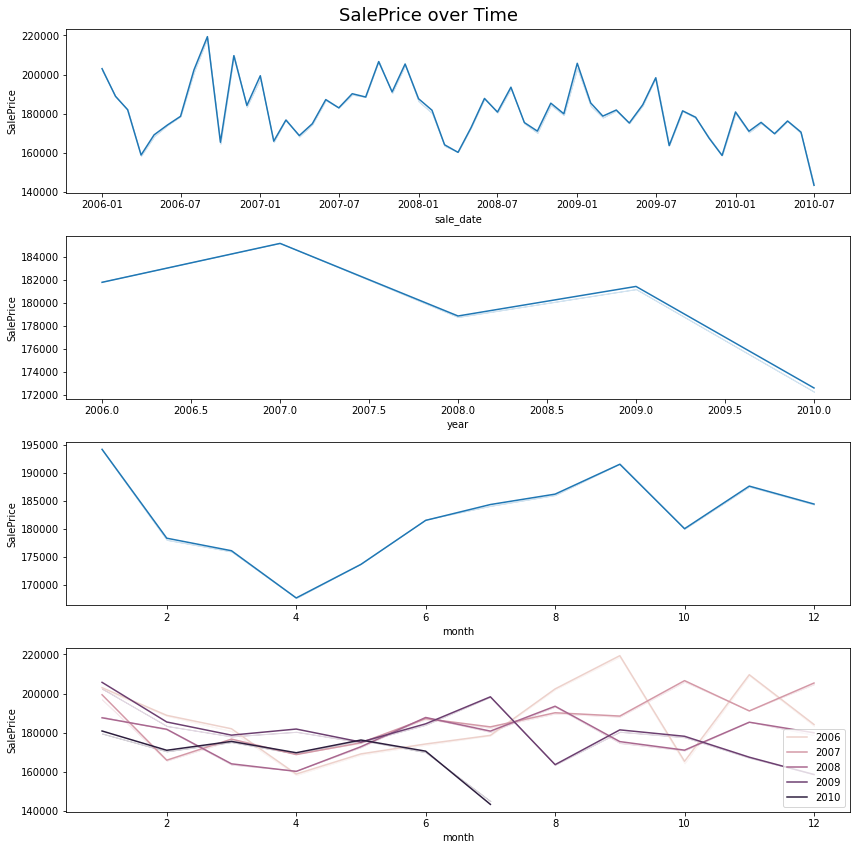

In [59]:
fig, ax = plt.subplots(nrows=4,ncols=1, figsize=(12, 12), tight_layout=True)

fig.suptitle("SalePrice over Time", fontsize=18)
sns.lineplot(data=df, x='sale_date', y='SalePrice', estimator=np.mean,ci=False, ax=ax[0])
sns.lineplot(data=df, x='year', y='SalePrice', estimator=np.mean,ci=False, ax=ax[1])
sns.lineplot(data=df, x='month', y='SalePrice', estimator=np.mean,ci=False, ax=ax[2])
sns.lineplot(data=df, x='month', y='SalePrice', hue='year',estimator=np.mean, ci=False, ax=ax[3])

plt.legend(loc='lower right')

fig.show()

We do see trends in both the Year and Month features. This means the timing of the sale will affect the 'SalePrice'. We also notice that our date range starts and ends mid-year. I will create a new feature 'month_in_range', which should bypass many issues in dealing with dates as well as provide a measure of recency to other dates.

In [60]:
start_date = df['sale_date'].min()
df['month_in_range'] = round((df['sale_date'] - start_date) / np.timedelta64(1, 'M'), 0).astype('int64')

#### Heating and Air
Due to the range of build years in this data set, we should check the heating and cooling variables.

In [69]:
df['Heating'].sort_values()

1219    Floor
0        GasA
1938     GasA
1939     GasA
1940     GasA
        ...  
2625     Wall
676      Wall
1553     Wall
896      Wall
678      Wall
Name: Heating, Length: 2930, dtype: object

## EDA - Feature Selection
At this point in the analysis, we have converted all the important categorical features to numeric, so we will first drop all remaining columns with the dtype 'object' and then move on to correlations to decide our final set of features to include in the model.

In [87]:
df = df.drop(df.columns[df.dtypes=='object'], axis=1)

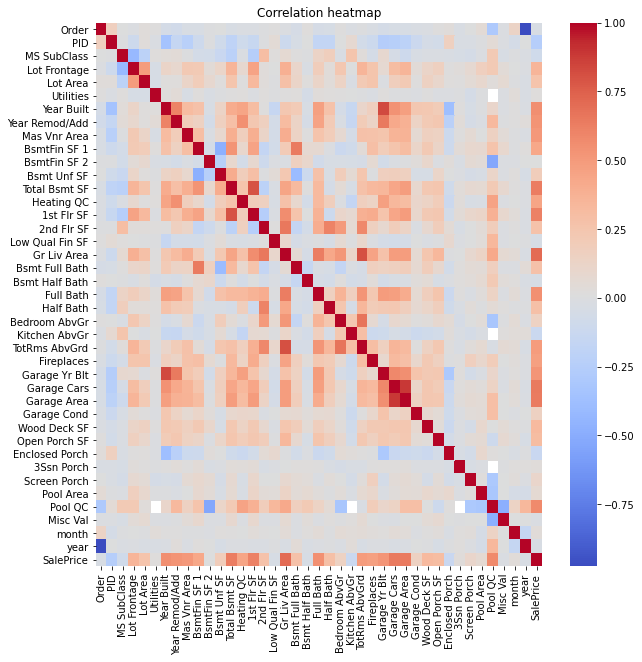

In [62]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title('Correlation heatmap')
plt.show()

In [63]:
df.corr()['SalePrice']

Order             -0.031408
PID               -0.246521
MS SubClass       -0.085092
Lot Frontage       0.357318
Lot Area           0.266549
Utilities          0.026032
Year Built         0.558426
Year Remod/Add     0.532974
Mas Vnr Area       0.508285
BsmtFin SF 1       0.432914
BsmtFin SF 2       0.005891
Bsmt Unf SF        0.182855
Total Bsmt SF      0.632280
Heating QC         0.450325
1st Flr SF         0.621676
2nd Flr SF         0.269373
Low Qual Fin SF   -0.037660
Gr Liv Area        0.706780
Bsmt Full Bath     0.276050
Bsmt Half Bath    -0.035835
Full Bath          0.545604
Half Bath          0.285056
Bedroom AbvGr      0.143913
Kitchen AbvGr     -0.119814
TotRms AbvGrd      0.495474
Fireplaces         0.474558
Garage Yr Blt      0.526965
Garage Cars        0.647812
Garage Area        0.640401
Garage Cond        0.154402
Wood Deck SF       0.327143
Open Porch SF      0.312951
Enclosed Porch    -0.128787
3Ssn Porch         0.032225
Screen Porch       0.112151
Pool Area          0

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 83 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Order            2930 non-null   int64         
 1   PID              2930 non-null   int64         
 2   MS SubClass      2930 non-null   int64         
 3   MS Zoning        2930 non-null   object        
 4   Lot Frontage     2440 non-null   float64       
 5   Lot Area         2930 non-null   int64         
 6   Street           2930 non-null   object        
 7   Alley            198 non-null    object        
 8   Lot Shape        2930 non-null   object        
 9   Land Contour     2930 non-null   object        
 10  Utilities        2930 non-null   int64         
 11  Lot Config       2930 non-null   object        
 12  Land Slope       2930 non-null   object        
 13  Neighborhood     2930 non-null   object        
 14  Condition 1      2930 non-null   object 

In [54]:
df['MS SubClass'].unique()

array([ 20,  60, 120,  50,  85, 160,  80,  30,  90, 190,  45,  70,  75,
        40, 180, 150], dtype=int64)

## EDA - summary

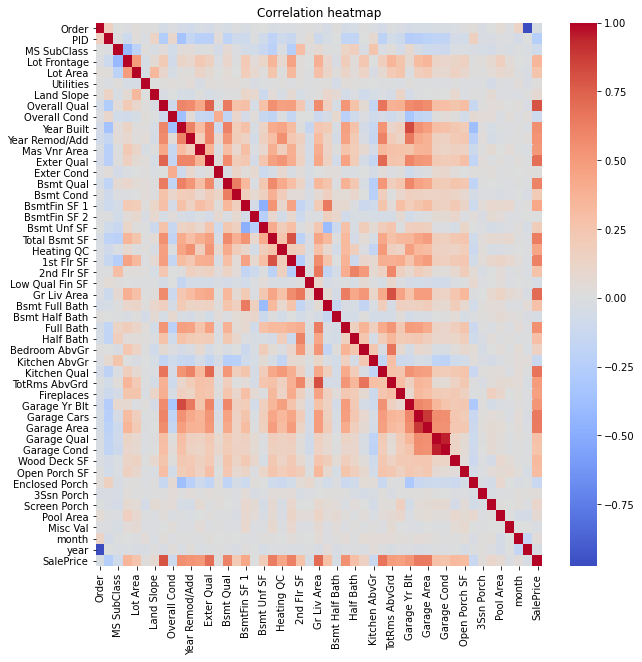

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title('Correlation heatmap')
plt.show()

In [24]:
df.corr()['SalePrice'].sort_values(ascending=False)

SalePrice          1.000000
Overall Qual       0.799262
Gr Liv Area        0.706780
Exter Qual         0.697970
Kitchen Qual       0.672914
Garage Cars        0.647877
Garage Area        0.640401
Total Bsmt SF      0.632280
1st Flr SF         0.621676
Bsmt Qual          0.607532
Year Built         0.558426
Full Bath          0.545604
Year Remod/Add     0.532974
Garage Yr Blt      0.526965
Mas Vnr Area       0.508285
TotRms AbvGrd      0.495474
Fireplaces         0.474558
Heating QC         0.450325
BsmtFin SF 1       0.432914
Lot Frontage       0.357318
Wood Deck SF       0.327143
Open Porch SF      0.312951
Half Bath          0.285056
Garage Qual        0.277952
Bsmt Full Bath     0.276050
2nd Flr SF         0.269373
Lot Area           0.266549
Garage Cond        0.261805
Bsmt Cond          0.212074
Bsmt Unf SF        0.182855
Bedroom AbvGr      0.143913
Screen Porch       0.112151
Pool Area          0.068403
Land Slope         0.066396
month              0.035259
3Ssn Porch         0

### Final Features
There is a lot of interesting information buried in our features. After checking the correlations plot for our numerical features alongside the bar charts for each of our non-numerical features, I've narrowed our final list of features. I will add them to a list and then rename them--because who really knows what "Mas Vnr Type" really means?

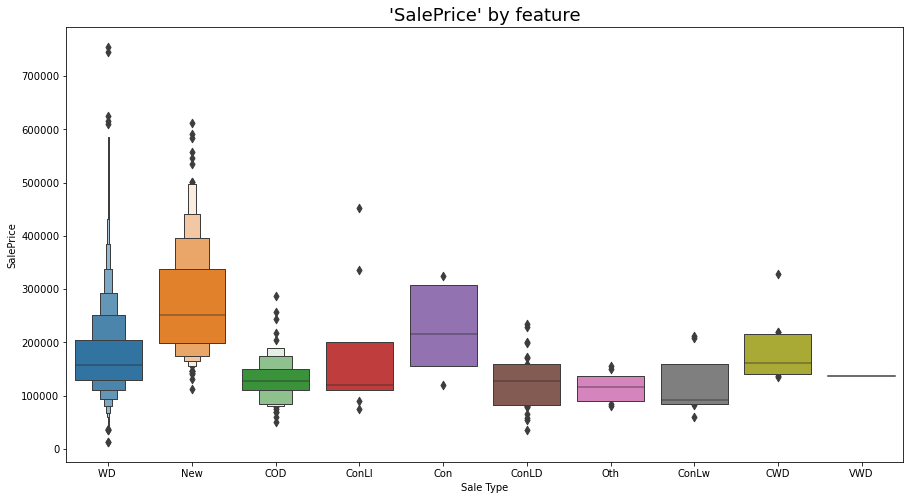

In [72]:
plt.figure(figsize=(15,8))
sns.boxenplot(data=df, x='Sale Type', y='SalePrice')
plt.title("'SalePrice' by feature", fontsize=18)
plt.show()

In [32]:
final_features = ['MS Zoning',
    'Overall Qual',
    'Gr Liv Area',
    'Exter Qual',
    'Garage Cars',
    'Total Bsmt SF',
    'Year Built',
    'Full Bath',
    'TotRms AbvGrd',
    'Fireplaces',
    'Wood Deck SF',
    'Open Porch SF',
    'Half Bath',
    'Lot Area',
    'Lot Config',
    'Neighborhood',
    'Bldg Type',
    'Exterior 1st',
    'Mas Vnr Type',
    'Foundation',
    'Heating',
    'Central Air',
    'Electrical',
    'Neighborhood',
    'Sale Type']

In [33]:
final_df = df[final_features]

In [34]:
final_df.columns

Index(['MS Zoning', 'Overall Qual', 'Gr Liv Area', 'Exter Qual', 'Garage Cars',
       'Total Bsmt SF', 'Year Built', 'Full Bath', 'TotRms AbvGrd',
       'Fireplaces', 'Wood Deck SF', 'Open Porch SF', 'Half Bath', 'Lot Area',
       'Land Contour', 'Lot Config', 'Neighborhood', 'Bldg Type',
       'Exterior 1st', 'Mas Vnr Type', 'Foundation', 'Heating', 'Central Air',
       'Electrical', 'Neighborhood', 'Sale Type'],
      dtype='object')

In [35]:
final_df.rename(columns={
    'MS Zoning' : 'zoning_class',
    'Overall Qual' : 'quality',
    'Gr Liv Area' : 'sq_ft',
    'Exter Qual' : 'ext_qual',
    'Garage Cars' : 'garage_cars',
    'Total Bsmt SF' : 'basement_sq_ft',
    'Year Built' : 'year',
    'Full Bath' : 'bath_full',
    'TotRms AbvGrd' : 'num_rooms',
    'Fireplaces' : 'fireplace',
    'Wood Deck SF' :'sq_ft_deck_wood',
    'Open Porch SF' : 'sq_ft_open_porch',
    'Half Bath' : 'bath_half',
    'Lot Area' : 'lot_size',
    'Land Contour' : 'land_contour',
    'Lot Config' : 'lot_config',
    'Neighborhood' : 'neighborhood',
    'Bldg Type' : 'type',
    'Exterior 1st' : 'ext_material',
    'Mas Vnr Type' : 'veneer_material',
    'Foundation' : 'foundation',
    'Heating' : 'heating',
    'Central Air' : 'central_air', 
    'Electrical' : 'electrical', 
    'Sale Type' : 'sale_type'
}, inplace=True)

In [36]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   zoning_class      2930 non-null   object 
 1   quality           2930 non-null   int64  
 2   sq_ft             2930 non-null   int64  
 3   ext_qual          2930 non-null   int32  
 4   garage_cars       2929 non-null   float64
 5   basement_sq_ft    2929 non-null   float64
 6   year              2930 non-null   int64  
 7   bath_full         2930 non-null   int64  
 8   num_rooms         2930 non-null   int64  
 9   fireplace         2930 non-null   int64  
 10  sq_ft_deck_wood   2930 non-null   int64  
 11  sq_ft_open_porch  2930 non-null   int64  
 12  bath_half         2930 non-null   int64  
 13  lot_size          2930 non-null   int64  
 14  land_contour      2930 non-null   object 
 15  lot_config        2930 non-null   object 
 16  neighborhood      2930 non-null   object 


One final step I like to take before movii

With that, it's on to the fun part... Modelling.

## Predictions
### Training and Testing data
First we need to split our data into a training set and a testing set.